# Desafio 1 - Maratona Behind the Code 2021

### Notebook guia

Esse Jupyter Notebook te dará instruções para criar uma solução introdutória para o desafio 1 da Maratona. Sinta-se livre para editar e melhorar sua solução!


**Atenção: se estiver utilizando o Watson Studio, lembre-se de deixar o Notebook como editável, clicando no botão de editar acima.**

![](https://s3.br-sao.cloud-object-storage.appdomain.cloud/maratona-static/edit-notebook.png)

## Exploração do dataset

O primeiro passo para o desenvolvimento de um bom modelo de Machine Learning é explorar bem os dados que temos para trabalhar. Devemos entender o melhor possível a relevância de cada dado para o valor que queremos predizer. Afinal, a predição do modelo é inteiramente baseada nos dados com que treinou.

Existem muitas bibliotecas em Python que podem ser utilizadas para tratamento e visualização de dados. Nesses exemplos, vamos usar Pandas, Seaborn e Matplotlib.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
def cat_exp (feature, alvo):
        plt.figure(figsize=(30,8))
        plt.subplot(1,2,1)
        sns.countplot(feature)
        plt.subplot(1,2,2)
        sns.countplot(feature, hue=alvo);
    
        return plt.show()

Primeiramente, vamos carregar o dataset do desafio neste Notebook. Vamos começar com o principal, `LOANS.csv`. Para isso, podemos usar o ícone de assets, disponível no canto superior direito da tela, e inserir o dataset como um DataFrame Pandas, como na imagem abaixo. 

<img width="300px" src="https://s3.br-sao.cloud-object-storage.appdomain.cloud/maratona-static/load-loans.png" />

Repita para todos os datasets que for utilizar.

In [3]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_6991ccecda0244a5955822de5d9e513e = 'https://s3.ap.cloud-object-storage.appdomain.cloud'
else:
    endpoint_6991ccecda0244a5955822de5d9e513e = 'https://s3.private.ap.cloud-object-storage.appdomain.cloud'

client_6991ccecda0244a5955822de5d9e513e = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='zc2IUJVAuS1uQqzAofJSAmXsr_Csut0uyCFnD3zCUwMz',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_6991ccecda0244a5955822de5d9e513e)

body = client_6991ccecda0244a5955822de5d9e513e.get_object(Bucket='bantotal-donotdelete-pr-hrmrwbzp4wmpy1',Key='LOANS.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,ID,PAYMENT_TERM,INSTALLMENT_PLANS,INSTALLMENT_PERCENT,LOAN_PURPOSE,LOAN_AMOUNT,OTHERS_ON_LOAN,ALLOW
0,610339,713.0,STORES,3.0,CAR_USED,3103.0,NONE,1
1,109167,341.0,STORES,1.0,CAR_NEW,716.0,NONE,1
2,823322,868.0,NONE,4.0,APPLIANCES,4333.0,NONE,1
3,322224,310.0,STORES,2.0,FURNITURE,250.0,NONE,1
4,912693,620.0,NONE,2.0,CAR_USED,2454.0,NONE,0


In [4]:

body = client_6991ccecda0244a5955822de5d9e513e.get_object(Bucket='bantotal-donotdelete-pr-hrmrwbzp4wmpy1',Key='ACCOUNTS.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()


,ID,CHECKING_BALANCE,CREDIT_HISTORY,EXISTING_SAVINGS,EXISTING_CREDITS_COUNT
0,291655,-566.53,ALL_CREDITS_PAID_BACK,36.42,1.0
1,657079,-1673.16,CREDITS_PAID_TO_DATE,22.9,1.0
2,256050,NO_CHECKING,CREDITS_PAID_TO_DATE,450.35,2.0
3,1039151,-1471.03,PRIOR_PAYMENTS_DELAYED,805.71,2.0
4,1002660,NO_CHECKING,CREDITS_PAID_TO_DATE,295.03,1.0


In [5]:

body = client_6991ccecda0244a5955822de5d9e513e.get_object(Bucket='bantotal-donotdelete-pr-hrmrwbzp4wmpy1',Key='DEMOGRAPHICS.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_3 = pd.read_csv(body)
df_data_3.head()


,ID,SEX,AGE,JOB_TYPE,DEPENDENTS,TELEPHONE,FOREIGN_WORKER,EMPLOYMENT_DURATION,PROPERTY,HOUSING,CURRENT_RESIDENCE_DURATION
0,24252,M,47.0,3.0,1.0,0.0,1.0,14.0,SAVINGS_INSURANCE,OWN,3.0
1,1002018,M,19.0,3.0,1.0,0.0,1.0,0.0,SAVINGS_INSURANCE,RENT,2.0
2,1240455,F,50.0,2.0,1.0,1.0,1.0,7.0,UNKNOWN,OWN,3.0
3,107799,M,35.0,3.0,1.0,0.0,1.0,0.0,REAL_ESTATE,OWN,2.0
4,184883,M,40.0,1.0,1.0,0.0,1.0,9.0,CAR_OTHER,OWN,4.0


Renomeie o nome da variável criada com o dataset para `loans`, para ficar de acordo com os códigos abaixo.

In [6]:
loans = df_data_1
accounts = df_data_2
demographics = df_data_3

In [7]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   3999 non-null   int64  
 1   PAYMENT_TERM         3975 non-null   float64
 2   INSTALLMENT_PLANS    3978 non-null   object 
 3   INSTALLMENT_PERCENT  3974 non-null   float64
 4   LOAN_PURPOSE         3979 non-null   object 
 5   LOAN_AMOUNT          3981 non-null   float64
 6   OTHERS_ON_LOAN       3977 non-null   object 
 7   ALLOW                3999 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 250.1+ KB


In [8]:
accounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2477 entries, 0 to 2476
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      2477 non-null   int64  
 1   CHECKING_BALANCE        2467 non-null   object 
 2   CREDIT_HISTORY          2462 non-null   object 
 3   EXISTING_SAVINGS        2467 non-null   object 
 4   EXISTING_CREDITS_COUNT  2463 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 96.9+ KB


In [9]:
demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3936 entries, 0 to 3935
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          3936 non-null   int64  
 1   SEX                         3920 non-null   object 
 2   AGE                         3918 non-null   float64
 3   JOB_TYPE                    3910 non-null   float64
 4   DEPENDENTS                  3915 non-null   float64
 5   TELEPHONE                   3915 non-null   float64
 6   FOREIGN_WORKER              3909 non-null   float64
 7   EMPLOYMENT_DURATION         3923 non-null   float64
 8   PROPERTY                    3918 non-null   object 
 9   HOUSING                     3912 non-null   object 
 10  CURRENT_RESIDENCE_DURATION  3917 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 338.4+ KB


In [10]:
df_la = pd.merge(loans,accounts,how='left', on='ID')

In [11]:
df_lad = pd.merge(df_la,demographics, how = 'left', on='ID' )

In [12]:
df_lad.describe()

,ID,PAYMENT_TERM,INSTALLMENT_PERCENT,LOAN_AMOUNT,ALLOW,EXISTING_CREDITS_COUNT,AGE,JOB_TYPE,DEPENDENTS,TELEPHONE,FOREIGN_WORKER,EMPLOYMENT_DURATION,CURRENT_RESIDENCE_DURATION
count,3.999000e+03,3975.000000,3974.000000,3981.000000,3999.000000,2463.000000,3918.000000,3910.000000,3915.000000,3915.000000,3909.000000,3923.000000,3917.000000
mean,6.603562e+05,653.796981,2.981379,3479.168802,0.664166,1.469752,36.032925,2.429923,1.161175,0.412005,0.975697,4.238848,2.865458
std,3.728332e+05,338.723239,1.121448,2489.961917,0.472340,0.569142,10.617743,0.931842,0.367739,0.492259,0.154008,3.595680,1.115873
min,9.800000e+01,120.000000,1.000000,250.000000,0.000000,1.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,3.418460e+05,390.000000,2.000000,1330.000000,0.000000,1.000000,28.000000,2.000000,1.000000,0.000000,1.000000,1.000000,2.000000
50%,6.670610e+05,651.000000,3.000000,3237.000000,1.000000,1.000000,36.000000,3.000000,1.000000,0.000000,1.000000,4.000000,3.000000
75%,9.778745e+05,899.000000,4.000000,5334.000000,1.000000,2.000000,44.000000,3.000000,1.000000,1.000000,1.000000,7.000000,4.000000
max,1.320082e+06,1984.000000,6.000000,11676.000000,1.000000,3.000000,74.000000,3.000000,2.000000,1.000000,1.000000,18.000000,6.000000


In [13]:
df_lad.isna().sum()

ID                               0
PAYMENT_TERM                    24
INSTALLMENT_PLANS               21
INSTALLMENT_PERCENT             25
LOAN_PURPOSE                    20
LOAN_AMOUNT                     18
OTHERS_ON_LOAN                  22
ALLOW                            0
CHECKING_BALANCE              1532
CREDIT_HISTORY                1537
EXISTING_SAVINGS              1532
EXISTING_CREDITS_COUNT        1536
SEX                             79
AGE                             81
JOB_TYPE                        89
DEPENDENTS                      84
TELEPHONE                       84
FOREIGN_WORKER                  90
EMPLOYMENT_DURATION             76
PROPERTY                        81
HOUSING                         87
CURRENT_RESIDENCE_DURATION      82
dtype: int64

In [14]:
df_lad.dtypes

ID                              int64
PAYMENT_TERM                  float64
INSTALLMENT_PLANS              object
INSTALLMENT_PERCENT           float64
LOAN_PURPOSE                   object
LOAN_AMOUNT                   float64
OTHERS_ON_LOAN                 object
ALLOW                           int64
CHECKING_BALANCE               object
CREDIT_HISTORY                 object
EXISTING_SAVINGS               object
EXISTING_CREDITS_COUNT        float64
SEX                            object
AGE                           float64
JOB_TYPE                      float64
DEPENDENTS                    float64
TELEPHONE                     float64
FOREIGN_WORKER                float64
EMPLOYMENT_DURATION           float64
PROPERTY                       object
HOUSING                        object
CURRENT_RESIDENCE_DURATION    float64
dtype: object

In [15]:
df_lad.isna().sum()

ID                               0
PAYMENT_TERM                    24
INSTALLMENT_PLANS               21
INSTALLMENT_PERCENT             25
LOAN_PURPOSE                    20
LOAN_AMOUNT                     18
OTHERS_ON_LOAN                  22
ALLOW                            0
CHECKING_BALANCE              1532
CREDIT_HISTORY                1537
EXISTING_SAVINGS              1532
EXISTING_CREDITS_COUNT        1536
SEX                             79
AGE                             81
JOB_TYPE                        89
DEPENDENTS                      84
TELEPHONE                       84
FOREIGN_WORKER                  90
EMPLOYMENT_DURATION             76
PROPERTY                        81
HOUSING                         87
CURRENT_RESIDENCE_DURATION      82
dtype: int64

In [16]:
df_lad.columns

Index(['ID', 'PAYMENT_TERM', 'INSTALLMENT_PLANS', 'INSTALLMENT_PERCENT',
       'LOAN_PURPOSE', 'LOAN_AMOUNT', 'OTHERS_ON_LOAN', 'ALLOW',
       'CHECKING_BALANCE', 'CREDIT_HISTORY', 'EXISTING_SAVINGS',
       'EXISTING_CREDITS_COUNT', 'SEX', 'AGE', 'JOB_TYPE', 'DEPENDENTS',
       'TELEPHONE', 'FOREIGN_WORKER', 'EMPLOYMENT_DURATION', 'PROPERTY',
       'HOUSING', 'CURRENT_RESIDENCE_DURATION'],
      dtype='object')

In [17]:
df_clear = df_lad.dropna()

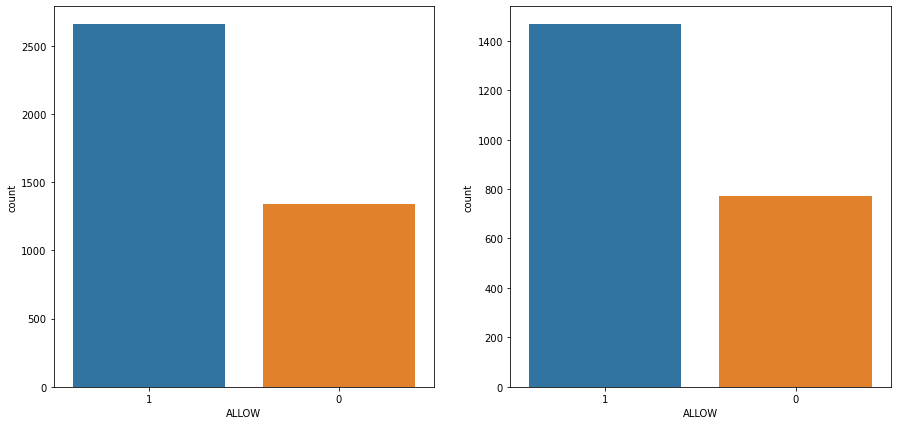

In [18]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.countplot(data=df_lad, x='ALLOW', order=loans['ALLOW'].value_counts().index)

plt.subplot(1,2,2)
risk_plot = sns.countplot(data=df_clear, x='ALLOW', order=loans['ALLOW'].value_counts().index)

Sinta-se livre para ver a distribuição de outras colunas do conjunto de dados, utilizar os outros conjuntos de dados, explorar as correlações entre variáveis e outros.

In [19]:
df_clear

,ID,PAYMENT_TERM,INSTALLMENT_PLANS,INSTALLMENT_PERCENT,LOAN_PURPOSE,LOAN_AMOUNT,OTHERS_ON_LOAN,ALLOW,CHECKING_BALANCE,CREDIT_HISTORY,...,SEX,AGE,JOB_TYPE,DEPENDENTS,TELEPHONE,FOREIGN_WORKER,EMPLOYMENT_DURATION,PROPERTY,HOUSING,CURRENT_RESIDENCE_DURATION
1522,291655,310.0,NONE,2.0,CAR_NEW,3503.0,NONE,1,-566.53,ALL_CREDITS_PAID_BACK,...,F,24.0,3.0,1.0,1.0,1.0,0.0,SAVINGS_INSURANCE,OWN,2.0
1523,657079,630.0,STORES,3.0,CAR_NEW,3729.0,NONE,1,-1673.16,CREDITS_PAID_TO_DATE,...,F,30.0,3.0,1.0,0.0,1.0,5.0,CAR_OTHER,RENT,1.0
1524,256050,868.0,NONE,3.0,CAR_USED,8516.0,NONE,0,NO_CHECKING,CREDITS_PAID_TO_DATE,...,M,40.0,3.0,1.0,0.0,1.0,4.0,UNKNOWN,OWN,4.0
1525,1039151,403.0,BANK,3.0,FURNITURE,2577.0,NONE,1,-1471.03,PRIOR_PAYMENTS_DELAYED,...,M,28.0,1.0,1.0,0.0,1.0,0.0,CAR_OTHER,OWN,3.0
1526,1002660,810.0,NONE,4.0,BUSINESS,3750.0,NONE,1,NO_CHECKING,CREDITS_PAID_TO_DATE,...,M,19.0,2.0,1.0,0.0,1.0,3.0,REAL_ESTATE,OWN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,636739,450.0,BANK,3.0,CAR_NEW,3007.0,CO-APPLICANT,0,163.82,CREDITS_PAID_TO_DATE,...,F,41.0,0.0,1.0,0.0,1.0,7.0,CAR_OTHER,OWN,3.0
3995,919733,510.0,NONE,4.0,VACATION,4191.0,GUARANTOR,1,14324.23,PRIOR_PAYMENTS_DELAYED,...,M,46.0,3.0,1.0,1.0,1.0,11.0,SAVINGS_INSURANCE,OWN,3.0
3996,115839,124.0,STORES,1.0,FURNITURE,250.0,NONE,1,130.13,PRIOR_PAYMENTS_DELAYED,...,M,28.0,3.0,1.0,1.0,1.0,7.0,CAR_OTHER,RENT,1.0
3997,1128684,961.0,BANK,3.0,BUSINESS,5172.0,NONE,1,NO_CHECKING,PRIOR_PAYMENTS_DELAYED,...,M,46.0,0.0,1.0,0.0,1.0,7.0,CAR_OTHER,RENT,3.0


In [20]:
3999-2237

1762

# Analise exploratoria univariada das features numericas

In [21]:
df_num = df_clear.select_dtypes(include = ['int64','float64'])
df_num.head()

,ID,PAYMENT_TERM,INSTALLMENT_PERCENT,LOAN_AMOUNT,ALLOW,EXISTING_CREDITS_COUNT,AGE,JOB_TYPE,DEPENDENTS,TELEPHONE,FOREIGN_WORKER,EMPLOYMENT_DURATION,CURRENT_RESIDENCE_DURATION
1522,291655,310.0,2.0,3503.0,1,1.0,24.0,3.0,1.0,1.0,1.0,0.0,2.0
1523,657079,630.0,3.0,3729.0,1,1.0,30.0,3.0,1.0,0.0,1.0,5.0,1.0
1524,256050,868.0,3.0,8516.0,0,2.0,40.0,3.0,1.0,0.0,1.0,4.0,4.0
1525,1039151,403.0,3.0,2577.0,1,2.0,28.0,1.0,1.0,0.0,1.0,0.0,3.0
1526,1002660,810.0,4.0,3750.0,1,1.0,19.0,2.0,1.0,0.0,1.0,3.0,3.0


In [22]:
df1_mean = pd.DataFrame(df_num.apply(np.mean)).T
df1_median = pd.DataFrame(df_num.apply(np.median)).T

df1_std = pd.DataFrame(df_num.apply(np.std)).T
df1_max = pd.DataFrame(df_num.apply(max)).T
df1_min = pd.DataFrame(df_num.apply(min)).T
df1_range = pd.DataFrame(df_num.apply(lambda x: x.max() - x.min())).T

num = pd.concat([df1_min, df1_max, df1_range, df1_mean, df1_median, df1_std]).T.reset_index()
num.columns = (['feature','min','max','range','media','mediana','desvio padrao'])
num

,feature,min,max,range,media,mediana,desvio padrao
0,ID,98.0,1319964.0,1319866.0,670698.486813,684660.0,372449.399562
1,PAYMENT_TERM,120.0,1984.0,1864.0,661.012070,651.0,342.397204
2,INSTALLMENT_PERCENT,1.0,6.0,5.0,3.004470,3.0,1.118774
3,LOAN_AMOUNT,250.0,11676.0,11426.0,3507.784533,3243.0,2504.461828
4,ALLOW,0.0,1.0,1.0,0.655342,1.0,0.475257
5,EXISTING_CREDITS_COUNT,1.0,3.0,2.0,1.469379,1.0,0.568567
6,AGE,19.0,73.0,54.0,35.963344,36.0,10.630020
7,JOB_TYPE,0.0,3.0,3.0,2.412606,3.0,0.947944
8,DEPENDENTS,1.0,2.0,1.0,1.162718,1.0,0.369108
9,TELEPHONE,0.0,1.0,1.0,0.414394,0.0,0.492617


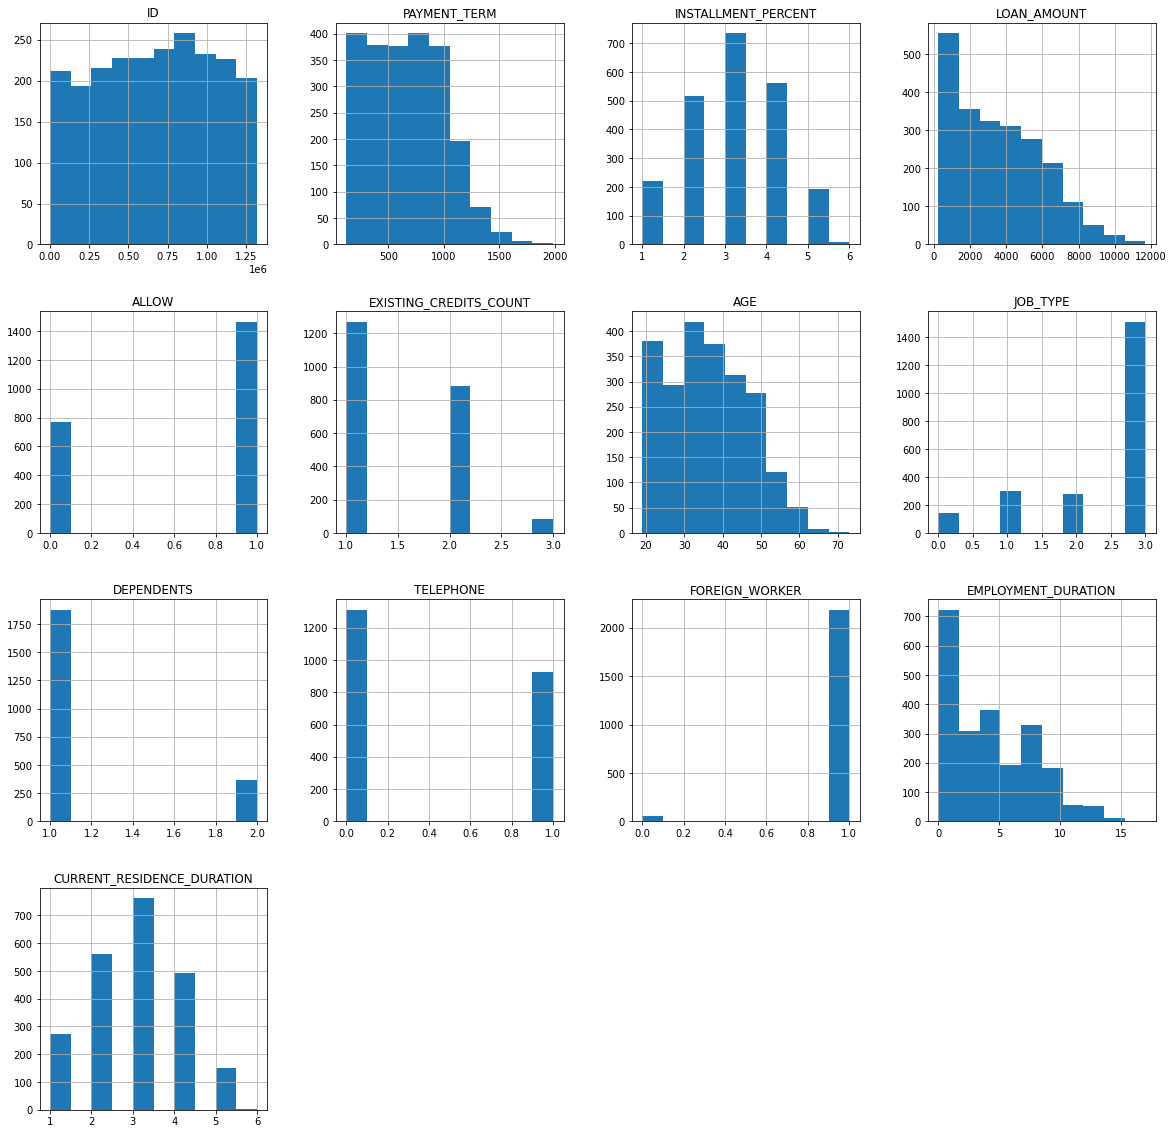

In [23]:
df_num.hist(figsize=(20,20));

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


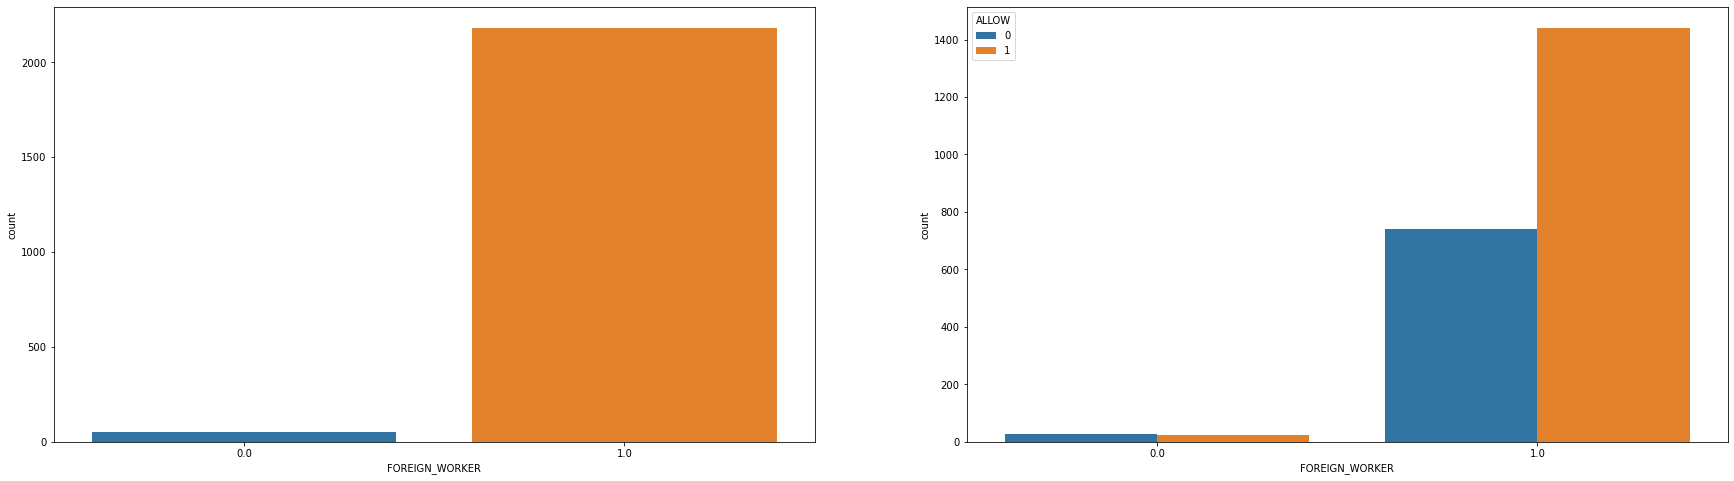

In [24]:
cat_exp(df_clear['FOREIGN_WORKER'],df_clear['ALLOW'])

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


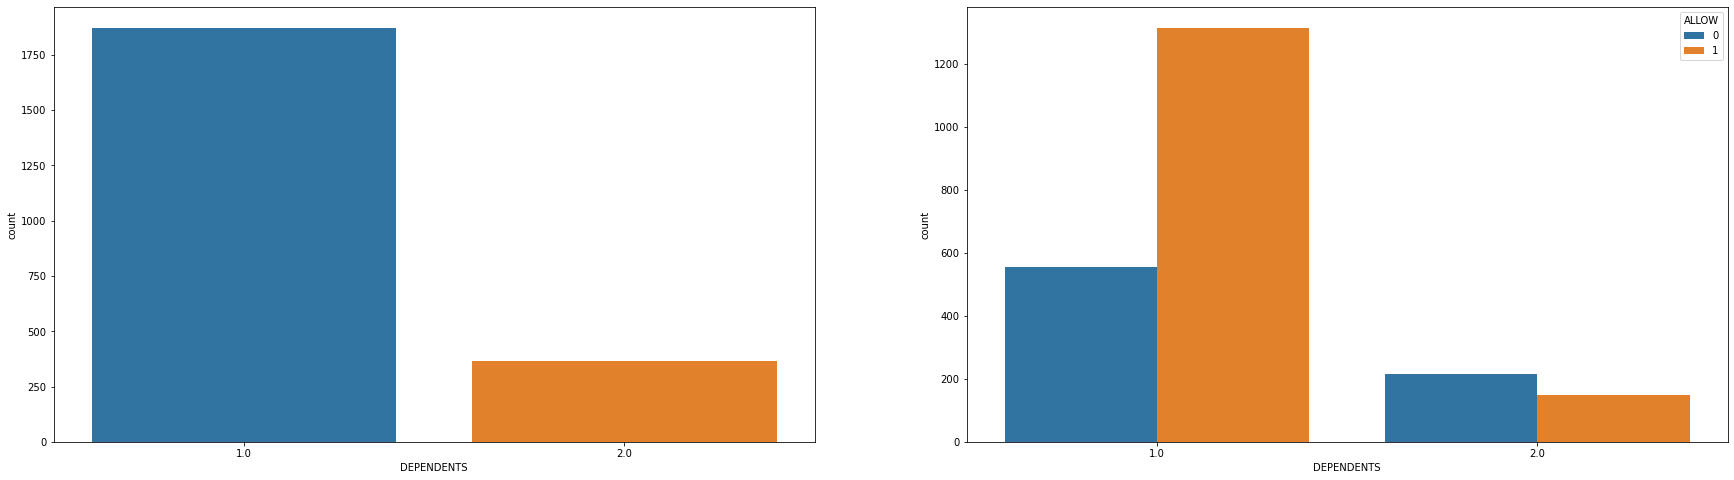

In [25]:
cat_exp(df_clear['DEPENDENTS'],df_clear['ALLOW'])

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


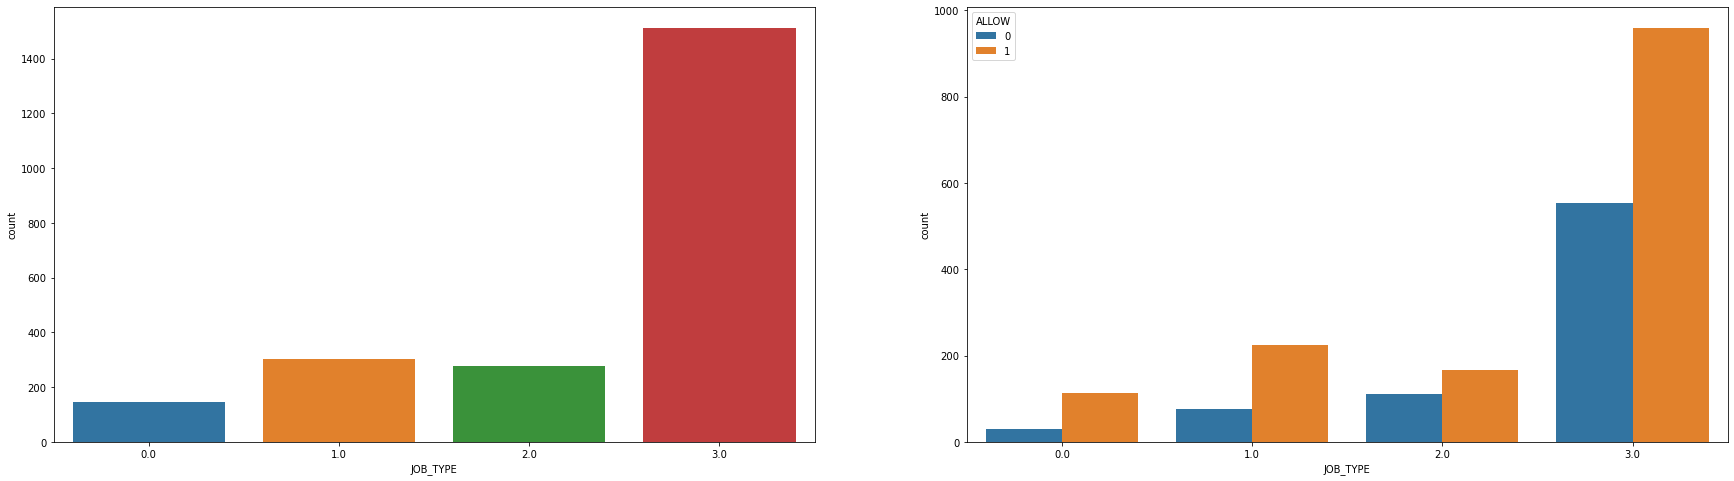

In [26]:
cat_exp(df_clear['JOB_TYPE'],df_clear['ALLOW'])

# Analise exploratoria das features categoricas

In [27]:
df_cat = df_clear.select_dtypes(include = ['object'])
df_cat.head()

,INSTALLMENT_PLANS,LOAN_PURPOSE,OTHERS_ON_LOAN,CHECKING_BALANCE,CREDIT_HISTORY,EXISTING_SAVINGS,SEX,PROPERTY,HOUSING
1522,NONE,CAR_NEW,NONE,-566.53,ALL_CREDITS_PAID_BACK,36.42,F,SAVINGS_INSURANCE,OWN
1523,STORES,CAR_NEW,NONE,-1673.16,CREDITS_PAID_TO_DATE,22.9,F,CAR_OTHER,RENT
1524,NONE,CAR_USED,NONE,NO_CHECKING,CREDITS_PAID_TO_DATE,450.35,M,UNKNOWN,OWN
1525,BANK,FURNITURE,NONE,-1471.03,PRIOR_PAYMENTS_DELAYED,805.71,M,CAR_OTHER,OWN
1526,NONE,BUSINESS,NONE,NO_CHECKING,CREDITS_PAID_TO_DATE,295.03,M,REAL_ESTATE,OWN


/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


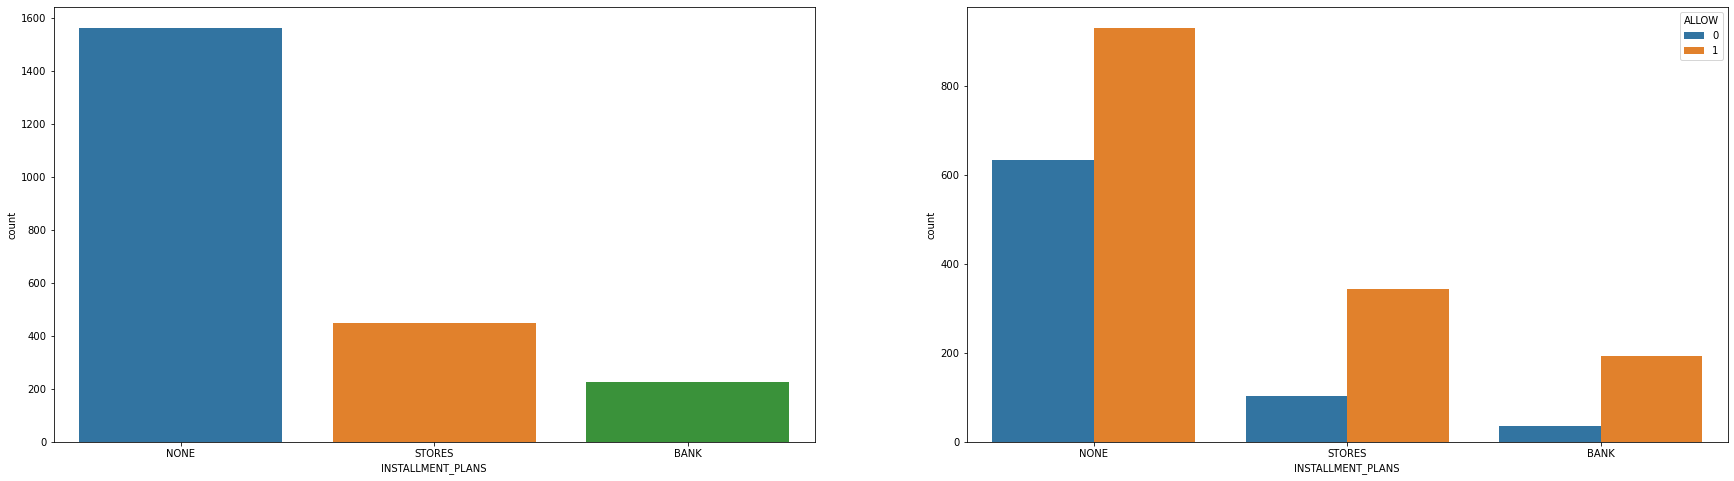

In [28]:
cat_exp(df_clear['INSTALLMENT_PLANS'],df_clear['ALLOW'])

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


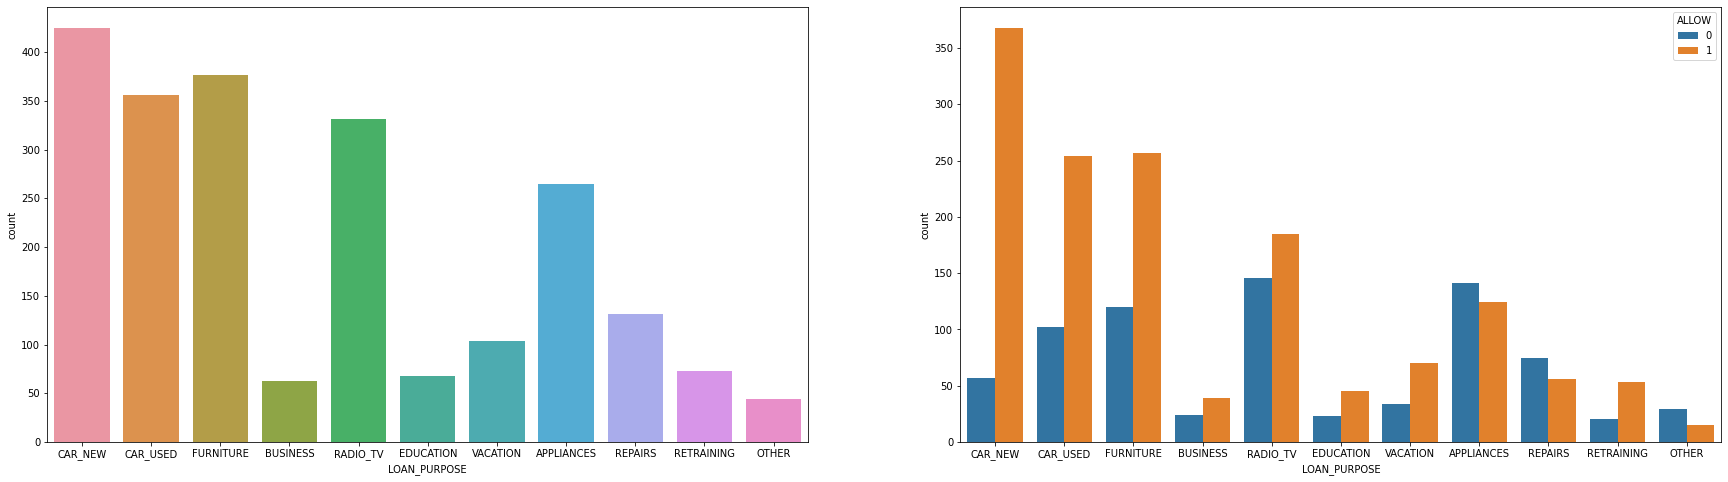

In [29]:
cat_exp(df_clear['LOAN_PURPOSE'],df_clear['ALLOW'])

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


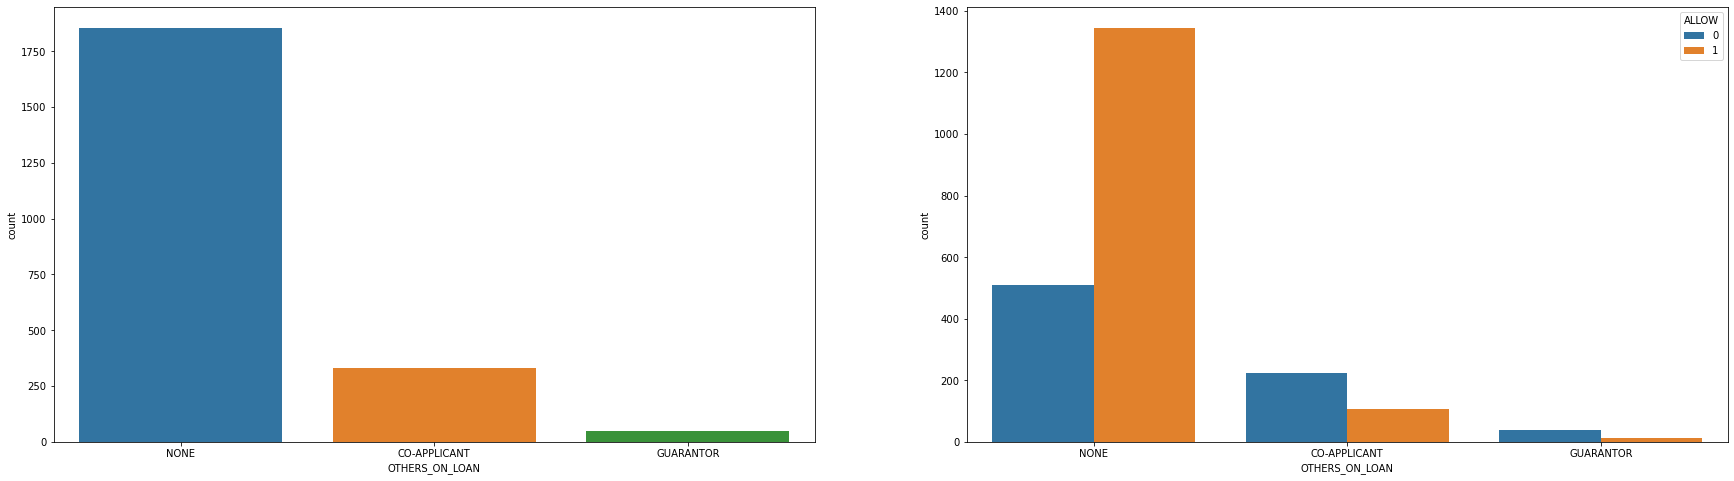

In [30]:
cat_exp(df_clear['OTHERS_ON_LOAN'],df_clear['ALLOW'])

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


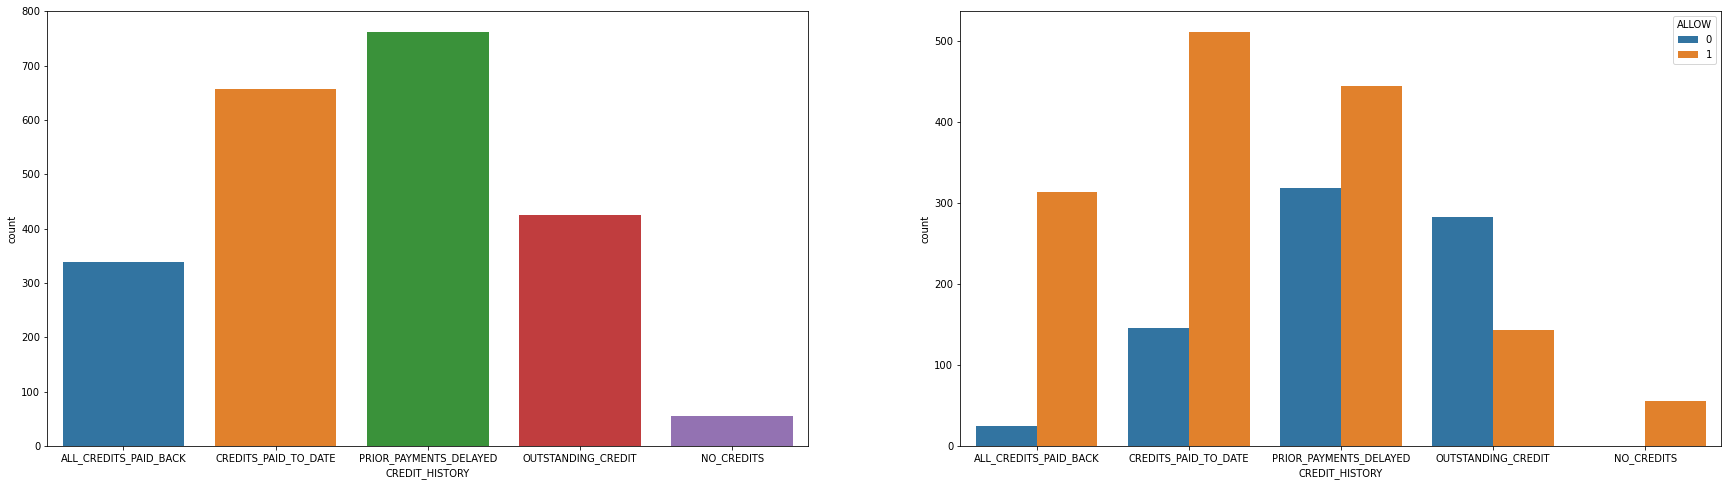

In [31]:
cat_exp(df_clear['CREDIT_HISTORY'],df_clear['ALLOW'])

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


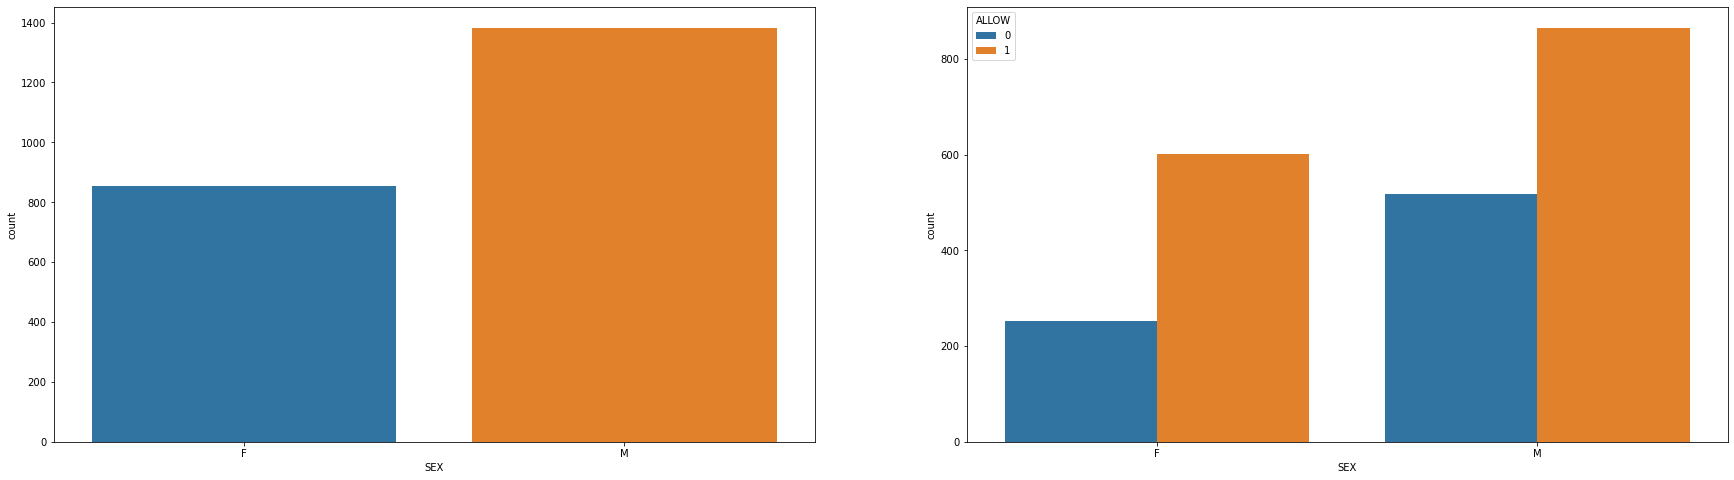

In [32]:
cat_exp(df_clear['SEX'],df_clear['ALLOW'])

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


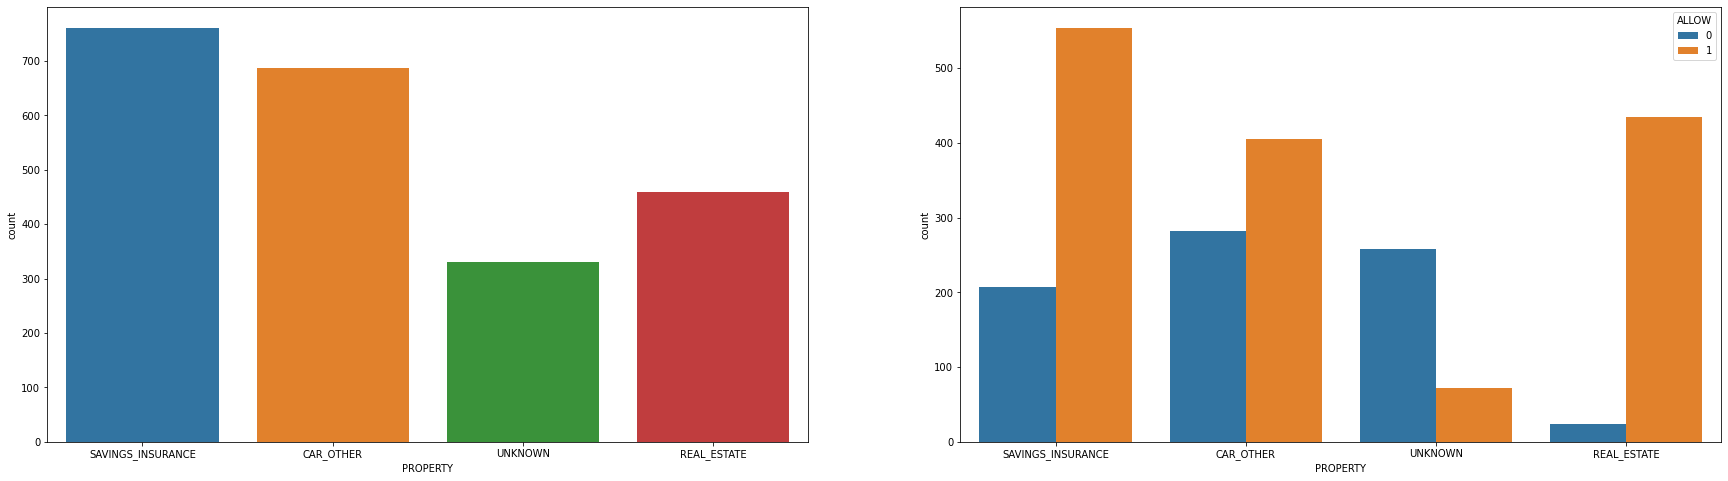

In [33]:
cat_exp(df_clear['PROPERTY'],df_clear['ALLOW'])

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


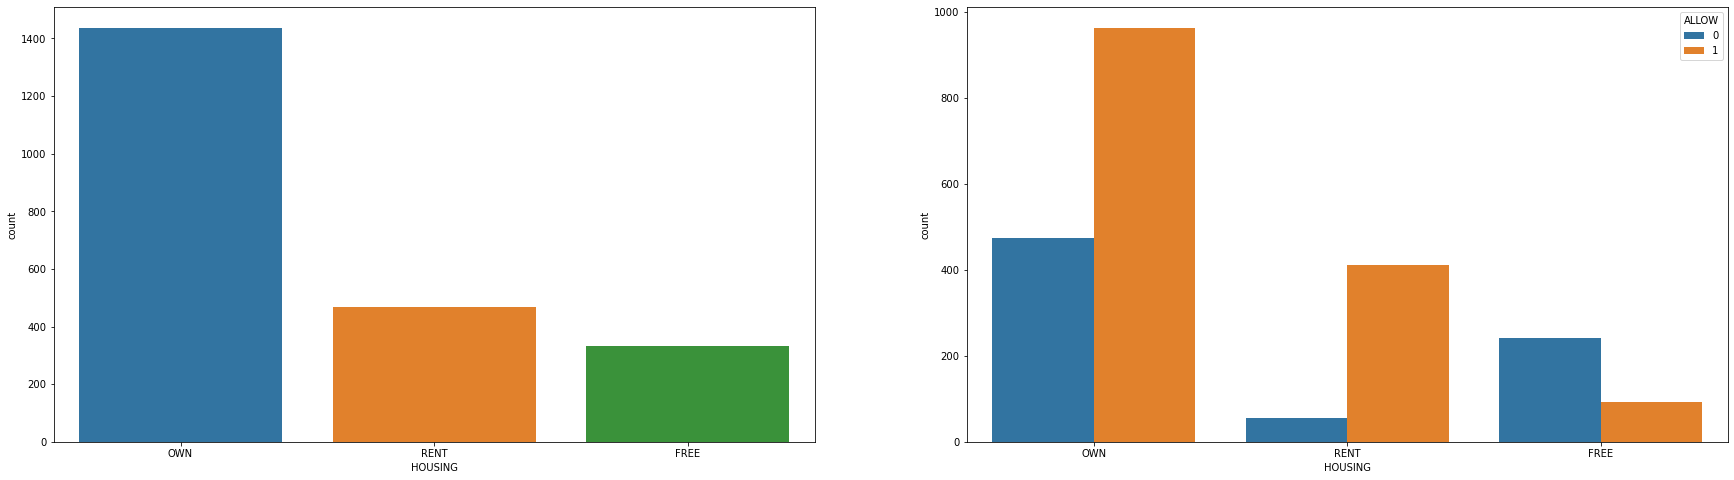

In [34]:
cat_exp(df_clear['HOUSING'],df_clear['ALLOW'])

In [35]:
df_clear['CHECKING_BALANCE'].describe()

count            2237
unique           1263
top       NO_CHECKING
freq              898
Name: CHECKING_BALANCE, dtype: object

In [36]:
df_clear['EXISTING_SAVINGS'].describe()

count        2237
unique       2035
top       UNKNOWN
freq          162
Name: EXISTING_SAVINGS, dtype: object

## Tratamento dos dados

Uma vez que exploramos os dados, entendemos a importância de cada coluna e podemos fazer alterações nelas para para obter um melhor resultado. Aqui, vamos fazer apenas um tratamento simples, de remover do dataset as linhas que tiverem faltando algum valor. Não necessariamente essa técnica é a melhor para se utilizar no desafio, é apenas um exemplo de como tratar o dataset.

Para tratamentos mais avançados, como modificação de colunas ou criação de novas colunas, veja mais abaixo no Notebook, em que explicamos como utilizar as `Pipelines`, da biblioteca `sklearn`, para realizar transformações nos dados.

In [37]:
df_clear.count()

ID                            2237
PAYMENT_TERM                  2237
INSTALLMENT_PLANS             2237
INSTALLMENT_PERCENT           2237
LOAN_PURPOSE                  2237
LOAN_AMOUNT                   2237
OTHERS_ON_LOAN                2237
ALLOW                         2237
CHECKING_BALANCE              2237
CREDIT_HISTORY                2237
EXISTING_SAVINGS              2237
EXISTING_CREDITS_COUNT        2237
SEX                           2237
AGE                           2237
JOB_TYPE                      2237
DEPENDENTS                    2237
TELEPHONE                     2237
FOREIGN_WORKER                2237
EMPLOYMENT_DURATION           2237
PROPERTY                      2237
HOUSING                       2237
CURRENT_RESIDENCE_DURATION    2237
dtype: int64

Podemos observar que agora temos um dataset "limpo", mas perdemos alguns dados por remover as linhas em que pelo menos uma coluna estava faltando.

In [38]:
df_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 1522 to 3998
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          2237 non-null   int64  
 1   PAYMENT_TERM                2237 non-null   float64
 2   INSTALLMENT_PLANS           2237 non-null   object 
 3   INSTALLMENT_PERCENT         2237 non-null   float64
 4   LOAN_PURPOSE                2237 non-null   object 
 5   LOAN_AMOUNT                 2237 non-null   float64
 6   OTHERS_ON_LOAN              2237 non-null   object 
 7   ALLOW                       2237 non-null   int64  
 8   CHECKING_BALANCE            2237 non-null   object 
 9   CREDIT_HISTORY              2237 non-null   object 
 10  EXISTING_SAVINGS            2237 non-null   object 
 11  EXISTING_CREDITS_COUNT      2237 non-null   float64
 12  SEX                         2237 non-null   object 
 13  AGE                         22

Observando a execução do método `.info()` acima, podemos ver que existem três colunas do tipo `object`. O modelo do `scikit-learn` que vamos usar não é capaz de processar uma variável desse tipo. Portanto, para dar seguimento ao experimento, vamos remover essa coluna. Recomendamos que você use alguma técnica para tratamento de variáveis categóricas, como o _one-hot encoding_, em vez de remover a coluna.

Vamos também remover a coluna `ID`, pois sabemos que ela não é uma informação útil para a predição (é apenas um número identificando um cliente).

# Tratamento das variaveis

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
mms = MinMaxScaler()

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PAYMENT_TERM'>

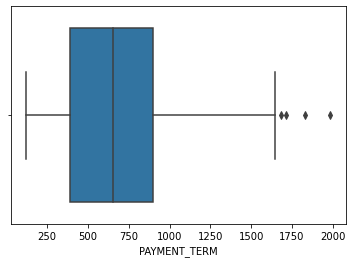

In [41]:
# PAYMENT_TERM
sns.boxplot(df_clear['PAYMENT_TERM'])

In [42]:
df_clear['PAYMENT_TERM'] = mms.fit_transform(df_clear[['PAYMENT_TERM']].values)

<ipython-input-42-d66f84937c94>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear['PAYMENT_TERM'] = mms.fit_transform(df_clear[['PAYMENT_TERM']].values)


/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PAYMENT_TERM'>

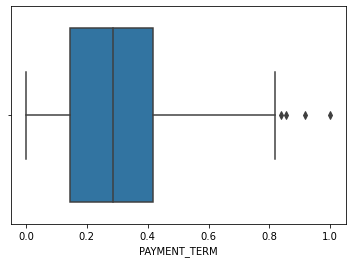

In [43]:
sns.boxplot(df_clear['PAYMENT_TERM'])

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LOAN_AMOUNT'>

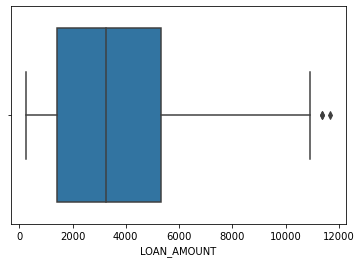

In [44]:
# LOAN_AMOUNT
sns.boxplot(df_clear['LOAN_AMOUNT'])

In [45]:
df_clear['LOAN_AMOUNT'] = mms.fit_transform(df_clear[['LOAN_AMOUNT']].values)

<ipython-input-45-4b5cfce764de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear['LOAN_AMOUNT'] = mms.fit_transform(df_clear[['LOAN_AMOUNT']].values)


In [46]:
#INSTALLMENT_PLANS

installment_plans_dict={'NONE' : 1 , 'STORES' : 2 , 'BANK' : 3 }
df_clear['INSTALLMENT_PLANS'] = df_clear['INSTALLMENT_PLANS'].map(installment_plans_dict)
df_clear['INSTALLMENT_PLANS'].head()

<ipython-input-46-2c4d53be0129>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear['INSTALLMENT_PLANS'] = df_clear['INSTALLMENT_PLANS'].map(installment_plans_dict)


1522    1
1523    2
1524    1
1525    3
1526    1
Name: INSTALLMENT_PLANS, dtype: int64

In [47]:
#LOAN_PURPOSE

loan_propose_dict={'CAR_NEW' : 1 , 'CAR_USED' : 2 , 'FURNITURE' : 3 , 'RADIO_TV':4 ,'VACATION':5 ,'REPAIRS':6 , 'RADIO_TV':7, 'RETRAINING':8, 'APPLIANCES':9 ,'EDUCATION':10 ,'BUSINESS':11}
df_clear['LOAN_PURPOSE'] = df_clear['LOAN_PURPOSE'].map(loan_propose_dict)
df_clear['LOAN_PURPOSE'].head()

<ipython-input-47-6f6306a0ba6b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear['LOAN_PURPOSE'] = df_clear['LOAN_PURPOSE'].map(loan_propose_dict)


1522     1.0
1523     1.0
1524     2.0
1525     3.0
1526    11.0
Name: LOAN_PURPOSE, dtype: float64

In [48]:
#OTHERS_ON_LOAN

other_on_loan_dict={'NONE' : 1 , 'CO-APPLICANT' : 2 , 'GUARANTOR' : 3 }
df_clear['OTHERS_ON_LOAN'] = df_clear['OTHERS_ON_LOAN'].map(other_on_loan_dict)
df_clear['OTHERS_ON_LOAN'].head()

<ipython-input-48-a3829d8dab81>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear['OTHERS_ON_LOAN'] = df_clear['OTHERS_ON_LOAN'].map(other_on_loan_dict)


1522    1
1523    1
1524    1
1525    1
1526    1
Name: OTHERS_ON_LOAN, dtype: int64

In [49]:
#CREDIT_HISTORY

credit_history_dict={'OUTSTANDING_CREDIT' : 1 , 'CREDITS_PAID_TO_DATE' : 2 , 'ALL_CREDITS_PAID_BACK': 3 ,'PRIOR_PAYMENTS_DELAYED': 4, 'NO_CREDITS': 5 }
df_clear['CREDIT_HISTORY'] = df_clear['CREDIT_HISTORY'].map(credit_history_dict)
df_clear['CREDIT_HISTORY'].head()

<ipython-input-49-ae55764a0da2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear['CREDIT_HISTORY'] = df_clear['CREDIT_HISTORY'].map(credit_history_dict)


1522    3
1523    2
1524    2
1525    4
1526    2
Name: CREDIT_HISTORY, dtype: int64

In [50]:
#SEX

sex_dict={'F' : 1 , 'M' : 2 }
df_clear['SEX'] = df_clear['SEX'].map(sex_dict)
df_clear['SEX'].head()

<ipython-input-50-328eeadaf0d8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear['SEX'] = df_clear['SEX'].map(sex_dict)


1522    1
1523    1
1524    2
1525    2
1526    2
Name: SEX, dtype: int64

In [51]:
#PROPERTY

property_dict={ 'REAL_ESTATE' : 1 ,'SAVINGS_INSURANCE'  : 2 , 'CAR_OTHER' : 3 , 'UNKNOWN' : 4 }
df_clear['PROPERTY'] = df_clear['PROPERTY'].map(property_dict)
df_clear['PROPERTY'].head()

<ipython-input-51-5fd3c251956b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear['PROPERTY'] = df_clear['PROPERTY'].map(property_dict)


1522    2
1523    3
1524    4
1525    3
1526    1
Name: PROPERTY, dtype: int64

In [52]:
#HOUSING

housing_dict={ 'OWN' : 1 ,'RENT'  : 2 , 'FREE' : 3 }
df_clear['HOUSING'] = df_clear['HOUSING'].map(housing_dict)
df_clear['HOUSING'].head()

<ipython-input-52-b56f620b12d6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear['HOUSING'] = df_clear['HOUSING'].map(housing_dict)


1522    1
1523    2
1524    1
1525    1
1526    1
Name: HOUSING, dtype: int64

In [53]:
#EXISTING_SAVINGS
# Assumindo valores de 0 para desconhecido e transformando demais valores em numerico
df_clear['EXISTING_SAVINGS'] = df_clear['EXISTING_SAVINGS'].apply(lambda x : 0 if x == 'UNKNOWN' else x)
df_clear['EXISTING_SAVINGS'] = df_clear['EXISTING_SAVINGS'].astype('float64')
df_clear['EXISTING_SAVINGS'].head()

<ipython-input-53-bf771ebb0c80>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear['EXISTING_SAVINGS'] = df_clear['EXISTING_SAVINGS'].apply(lambda x : 0 if x == 'UNKNOWN' else x)
<ipython-input-53-bf771ebb0c80>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear['EXISTING_SAVINGS'] = df_clear['EXISTING_SAVINGS'].astype('float64')


1522     36.42
1523     22.90
1524    450.35
1525    805.71
1526    295.03
Name: EXISTING_SAVINGS, dtype: float64

In [54]:
#CHECKING_BALANCE
# Assumindo valores de 0 para credito negativo, 1 para nao checado ou nulo e 2 para positivo
df_clear['CHECKING_BALANCE'] = df_clear['CHECKING_BALANCE'].apply(lambda x : 1 if x == 'NO_CHECKING' or 0 else x)
df_clear['CHECKING_BALANCE'] = df_clear['CHECKING_BALANCE'].astype('float64')
df_clear['CHECKING_BALANCE'] = df_clear['CHECKING_BALANCE'].apply(lambda x : 2 if x > 0 else 0)
df_clear['CHECKING_BALANCE'].head()

<ipython-input-54-03f427390a74>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear['CHECKING_BALANCE'] = df_clear['CHECKING_BALANCE'].apply(lambda x : 1 if x == 'NO_CHECKING' or 0 else x)
<ipython-input-54-03f427390a74>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear['CHECKING_BALANCE'] = df_clear['CHECKING_BALANCE'].astype('float64')
<ipython-input-54-03f427390a74>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

1522    0
1523    0
1524    2
1525    0
1526    2
Name: CHECKING_BALANCE, dtype: int64

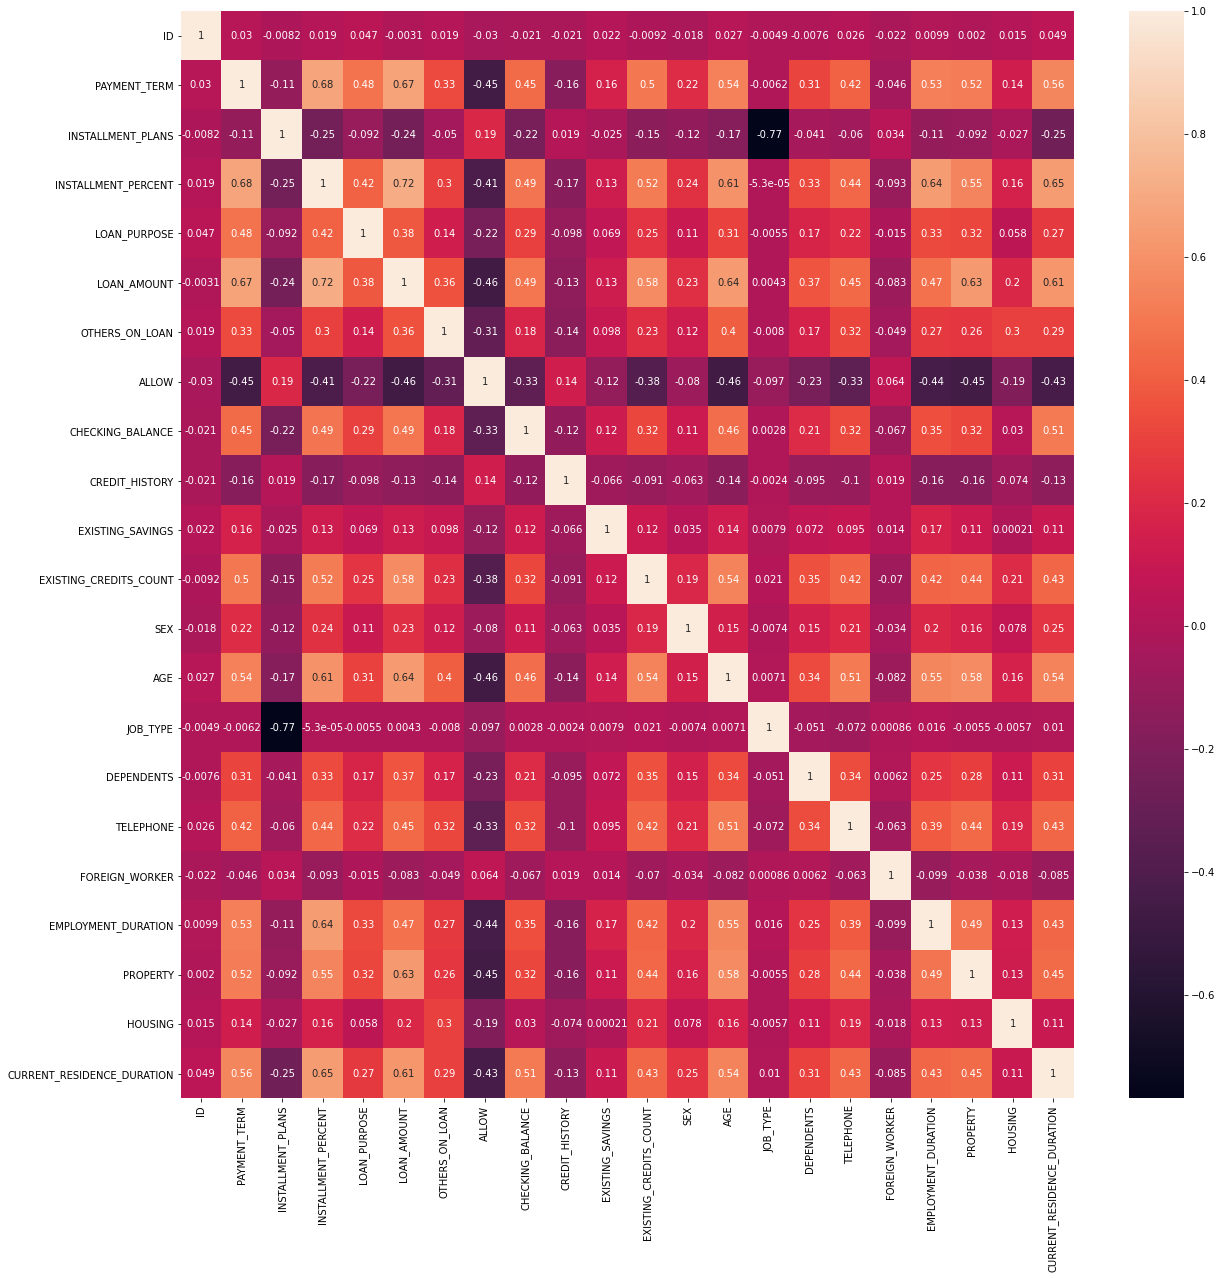

In [55]:
plt.figure(figsize=(20,20))
sns.heatmap(df_clear.corr(method='pearson'), annot=True);

In [56]:
df_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 1522 to 3998
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          2237 non-null   int64  
 1   PAYMENT_TERM                2237 non-null   float64
 2   INSTALLMENT_PLANS           2237 non-null   int64  
 3   INSTALLMENT_PERCENT         2237 non-null   float64
 4   LOAN_PURPOSE                2193 non-null   float64
 5   LOAN_AMOUNT                 2237 non-null   float64
 6   OTHERS_ON_LOAN              2237 non-null   int64  
 7   ALLOW                       2237 non-null   int64  
 8   CHECKING_BALANCE            2237 non-null   int64  
 9   CREDIT_HISTORY              2237 non-null   int64  
 10  EXISTING_SAVINGS            2237 non-null   float64
 11  EXISTING_CREDITS_COUNT      2237 non-null   float64
 12  SEX                         2237 non-null   int64  
 13  AGE                         22

In [57]:
# 'ID', 'INSTALLMENT_PLANS', 'LOAN_PURPOSE', 'CREDIT_HISTORY', 'EXISTING_SAVINGS', 'SEX', 'JOB_TYPE', 'DEPENDENTS', 'FOREIGN_WORKER', 'HOUSING'# excluidos

In [58]:
# PAYMENT_TERM', 'INSTALLMENT_PERCENT', 'OTHERS_ON_LOAN', 'CHECKING_BALANCE', 'EXISTING_CREDITS_COUNT', 'AGE', 'TELEPHONE',  'EMPLOYMENT_DURATION', 'PROPERTY', 'CURRENT_RESIDENCE_DURATION' # usados

# Preparação dos dados para Machine Learning

In [59]:
object_columns = ['ID', 'INSTALLMENT_PLANS', 'LOAN_PURPOSE',  'EXISTING_SAVINGS', 'SEX', 'JOB_TYPE', 'DEPENDENTS', 'FOREIGN_WORKER', 'HOUSING']
df_ml = df_clear.drop(object_columns, axis=1)

In [60]:
df_ml.describe()

,PAYMENT_TERM,INSTALLMENT_PERCENT,LOAN_AMOUNT,OTHERS_ON_LOAN,ALLOW,CHECKING_BALANCE,CREDIT_HISTORY,EXISTING_CREDITS_COUNT,AGE,TELEPHONE,EMPLOYMENT_DURATION,PROPERTY,CURRENT_RESIDENCE_DURATION
count,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000
mean,0.290243,3.004470,0.285120,1.193563,0.655342,1.383102,2.716138,1.469379,35.963344,0.414394,4.237371,2.396960,2.864104
std,0.183731,1.119025,0.219239,0.449203,0.475363,0.923912,1.188561,0.568694,10.632396,0.492727,3.590695,0.972221,1.103881
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,19.000000,0.000000,0.000000,1.000000,1.000000
25%,0.144850,2.000000,0.100735,1.000000,0.000000,0.000000,2.000000,1.000000,28.000000,0.000000,1.000000,2.000000,2.000000
50%,0.284871,3.000000,0.261946,1.000000,1.000000,2.000000,3.000000,1.000000,36.000000,0.000000,4.000000,2.000000,3.000000
75%,0.418455,4.000000,0.442937,1.000000,1.000000,2.000000,4.000000,2.000000,44.000000,1.000000,7.000000,3.000000,4.000000
max,1.000000,6.000000,1.000000,3.000000,1.000000,2.000000,5.000000,3.000000,73.000000,1.000000,17.000000,4.000000,6.000000


## Criação do modelo

Com os dados prontos, podemos selecionar um modelo de Machine Learning para treinar com nossos dados. Nesse exemplo, vamos utilizar um modelo de classificação básico, o de Árvore de Decisão.

Para conseguir avaliar o desempenho do nosso modelo, vamos dividir os dados que temos entre dados de treino e de teste, e assim, após o treinamento, verificar como ele está se saindo com as predições.

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

Abaixo, separamos os dados que queremos predizer dos dados que utilizamos como informações para a predição.

In [62]:
features = ['PAYMENT_TERM', 'INSTALLMENT_PERCENT', 'OTHERS_ON_LOAN', 'CHECKING_BALANCE', 'EXISTING_CREDITS_COUNT', 'CREDIT_HISTORY','AGE', 'TELEPHONE',  'EMPLOYMENT_DURATION', 'PROPERTY', 'CURRENT_RESIDENCE_DURATION']
target = ['ALLOW']

X = df_ml[features]
y = df_ml[target]

In [63]:
seed = 12
test_pct = 0.3 # Separaremos 30% dos dados para testes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_pct)

In [64]:
## Decision Tree Classifer
model = DecisionTreeClassifier(random_state=seed)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = f1_score(y_test, y_pred)
print(f"Acurácia do modelo Decision Tree Classifer (número de predições assertivas sobre número total de testes): {acc}")

Acurácia do modelo Decision Tree Classifer (número de predições assertivas sobre número total de testes): 0.7554038680318543


In [65]:
## Logistic Regressions
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=seed)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = f1_score(y_test, y_pred)
print(f"Acurácia do modelo Logistic Regressions (número de predições assertivas sobre número total de testes): {acc}")

Acurácia do modelo Logistic Regressions (número de predições assertivas sobre número total de testes): 0.8494041170097508


/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [66]:
## Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
acc = f1_score(y_test, y_pred)
print(f"Acurácia do modelo Naive Bayes (número de predições assertivas sobre número total de testes): {acc}")

Acurácia do modelo Naive Bayes (número de predições assertivas sobre número total de testes): 0.7981109799291618


/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [67]:
## KNN
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 10)
model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
acc = f1_score(y_test, y_pred)
print(f"Acurácia do modelo KNN (número de predições assertivas sobre número total de testes): {acc}")

<ipython-input-67-ef4d32838e06>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(X_train, y_train)


Acurácia do modelo KNN (número de predições assertivas sobre número total de testes): 0.8200455580865603


In [68]:
## SVM
from sklearn.svm import SVC
model = SVC(kernel = 'linear', C=0.025, random_state=seed)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = f1_score(y_test, y_pred)
print(f"Acurácia do modelo SVC (número de predições assertivas sobre número total de testes): {acc}")

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Acurácia do modelo SVC (número de predições assertivas sobre número total de testes): 0.8433476394849784


# SVC Como modelo escolhido

In [69]:
steps=[0.005, 0.025, 0.050, 0.075 ,0.1 , 0.125 , 0.15 , 0.2, 0.25]

for x in steps:
    model = SVC(kernel = 'linear', C=x, random_state=seed)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    acc = f1_score(y_test, y_pred)
    print(f"Acurácia do modelo SVC (número de predições assertivas sobre número total de testes): {acc}")

Acurácia do modelo SVC (número de predições assertivas sobre número total de testes): 0.8417653390742733


/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Acurácia do modelo SVC (número de predições assertivas sobre número total de testes): 0.8433476394849784


/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Acurácia do modelo SVC (número de predições assertivas sobre número total de testes): 0.8433476394849784


/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Acurácia do modelo SVC (número de predições assertivas sobre número total de testes): 0.8430107526881722


/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Acurácia do modelo SVC (número de predições assertivas sobre número total de testes): 0.8467309753483387


/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Acurácia do modelo SVC (número de predições assertivas sobre número total de testes): 0.8445873526259379


/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Acurácia do modelo SVC (número de predições assertivas sobre número total de testes): 0.8445873526259379


/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Acurácia do modelo SVC (número de predições assertivas sobre número total de testes): 0.8436830835117772


/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Acurácia do modelo SVC (número de predições assertivas sobre número total de testes): 0.8436830835117772


In [70]:
steps=[1234,17894,6547,123,123,345,5421]
for x in steps:
    model = SVC(kernel = 'linear', C=0.2, random_state=x)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    acc = f1_score(y_test, y_pred)
    print(f"Acurácia do modelo SVC (número de predições assertivas sobre número total de testes): {acc}")

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Acurácia do modelo SVC (número de predições assertivas sobre número total de testes): 0.8436830835117772


/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Acurácia do modelo SVC (número de predições assertivas sobre número total de testes): 0.8436830835117772


/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Acurácia do modelo SVC (número de predições assertivas sobre número total de testes): 0.8436830835117772


/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Acurácia do modelo SVC (número de predições assertivas sobre número total de testes): 0.8436830835117772
Acurácia do modelo SVC (número de predições assertivas sobre número total de testes): 0.8436830835117772


/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Acurácia do modelo SVC (número de predições assertivas sobre número total de testes): 0.8436830835117772
Acurácia do modelo SVC (número de predições assertivas sobre número total de testes): 0.8436830835117772


/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


# Import Answers

In [71]:

body = client_6991ccecda0244a5955822de5d9e513e.get_object(Bucket='bantotal-donotdelete-pr-hrmrwbzp4wmpy1',Key='ANSWERS.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_4 = pd.read_csv(body)
df_data_4.head()


,ID,CHECKING_BALANCE,PAYMENT_TERM,CREDIT_HISTORY,LOAN_PURPOSE,LOAN_AMOUNT,EXISTING_SAVINGS,EMPLOYMENT_DURATION,INSTALLMENT_PERCENT,SEX,...,PROPERTY,AGE,INSTALLMENT_PLANS,HOUSING,EXISTING_CREDITS_COUNT,JOB_TYPE,DEPENDENTS,TELEPHONE,FOREIGN_WORKER,ALLOW
0,1078506,25.84,465,NO_CREDITS,CAR_NEW,250,38.35,0,1,F,...,REAL_ESTATE,32,STORES,OWN,1,3,1,0,1,TO_FILL
1,947575,-439.72,120,ALL_CREDITS_PAID_BACK,CAR_NEW,250,1.62,0,2,M,...,REAL_ESTATE,25,STORES,RENT,1,3,1,0,1,TO_FILL
2,133043,169.45,527,PRIOR_PAYMENTS_DELAYED,RADIO_TV,2207,184.97,6,2,M,...,SAVINGS_INSURANCE,32,STORES,OWN,2,1,2,0,1,TO_FILL
3,1031383,NO_CHECKING,720,OUTSTANDING_CREDIT,CAR_USED,5064,731.03,6,4,M,...,CAR_OTHER,49,NONE,OWN,2,3,1,0,1,TO_FILL
4,491563,NO_CHECKING,420,OUTSTANDING_CREDIT,FURNITURE,3763,396.26,4,3,F,...,CAR_OTHER,46,STORES,OWN,1,1,2,1,1,TO_FILL


In [72]:
df_answers = df_data_4

In [73]:
df_answers = df_answers.dropna()

df_answers['PAYMENT_TERM'] = mms.fit_transform(df_answers[['PAYMENT_TERM']].values)
df_answers['LOAN_AMOUNT'] = mms.fit_transform(df_answers[['LOAN_AMOUNT']].values)

installment_plans_dict={'NONE' : 1 , 'STORES' : 2 , 'BANK' : 3 }
df_answers['INSTALLMENT_PLANS'] = df_answers['INSTALLMENT_PLANS'].map(installment_plans_dict)

loan_propose_dict={'CAR_NEW' : 1 , 'CAR_USED' : 2 , 'FURNITURE' : 3 , 'RADIO_TV':4 ,'VACATION':5 ,'REPAIRS':6 , 'RADIO_TV':7, 'RETRAINING':8, 'APPLIANCES':9 ,'EDUCATION':10 ,'BUSINESS':11}
df_answers['LOAN_PURPOSE'] = df_answers['LOAN_PURPOSE'].map(loan_propose_dict)

other_on_loan_dict={'NONE' : 1 , 'CO-APPLICANT' : 2 , 'GUARANTOR' : 3 }
df_answers['OTHERS_ON_LOAN'] = df_answers['OTHERS_ON_LOAN'].map(other_on_loan_dict)

credit_history_dict={'OUTSTANDING_CREDIT' : 1 , 'CREDITS_PAID_TO_DATE' : 2 , 'ALL_CREDITS_PAID_BACK': 3 ,'PRIOR_PAYMENTS_DELAYED': 4, 'NO_CREDITS': 5 }
df_answers['CREDIT_HISTORY'] = df_answers['CREDIT_HISTORY'].map(credit_history_dict)

sex_dict={'F' : 1 , 'M' : 2 }
df_answers['SEX'] = df_answers['SEX'].map(sex_dict)

property_dict={ 'REAL_ESTATE' : 1 ,'SAVINGS_INSURANCE'  : 2 , 'CAR_OTHER' : 3 , 'UNKNOWN' : 4 }
df_answers['PROPERTY'] = df_answers['PROPERTY'].map(property_dict)

housing_dict={ 'OWN' : 1 ,'RENT'  : 2 , 'FREE' : 3 }
df_answers['HOUSING'] = df_answers['HOUSING'].map(housing_dict)

df_answers['EXISTING_SAVINGS'] = df_answers['EXISTING_SAVINGS'].apply(lambda x : 0 if x == 'UNKNOWN' else x)
df_answers['EXISTING_SAVINGS'] = df_answers['EXISTING_SAVINGS'].astype('float64')

df_answers['CHECKING_BALANCE'] = df_answers['CHECKING_BALANCE'].apply(lambda x : 1 if x == 'NO_CHECKING' or 0 else x)
df_answers['CHECKING_BALANCE'] = df_answers['CHECKING_BALANCE'].astype('float64')
df_answers['CHECKING_BALANCE'] = df_answers['CHECKING_BALANCE'].apply(lambda x : 2 if x > 0 else 0)

allow_dict={'TO_FILL': 0}
df_answers['ALLOW'] = df_answers['ALLOW'].map(allow_dict)
df_answers.at[1,'ALLOW'] = 1

In [74]:
df_answers['ALLOW'].describe()

count    1000.000000
mean        0.001000
std         0.031623
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: ALLOW, dtype: float64

In [75]:
features_answers = ['PAYMENT_TERM', 'INSTALLMENT_PERCENT', 'OTHERS_ON_LOAN', 'CHECKING_BALANCE', 'EXISTING_CREDITS_COUNT', 'CREDIT_HISTORY','AGE', 'TELEPHONE',  'EMPLOYMENT_DURATION', 'PROPERTY', 'CURRENT_RESIDENCE_DURATION']
target_answers = ['ALLOW']

X_answers = df_answers[features]
y_answers = df_answers[target]

In [77]:
X

,PAYMENT_TERM,INSTALLMENT_PERCENT,OTHERS_ON_LOAN,CHECKING_BALANCE,EXISTING_CREDITS_COUNT,CREDIT_HISTORY,AGE,TELEPHONE,EMPLOYMENT_DURATION,PROPERTY,CURRENT_RESIDENCE_DURATION
1522,0.101931,2.0,1,0,1.0,3,24.0,1.0,0.0,2,2.0
1523,0.273605,3.0,1,0,1.0,2,30.0,0.0,5.0,3,1.0
1524,0.401288,3.0,1,2,2.0,2,40.0,0.0,4.0,4,4.0
1525,0.151824,3.0,1,0,2.0,4,28.0,0.0,0.0,3,3.0
1526,0.370172,4.0,1,2,1.0,2,19.0,0.0,3.0,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.177039,3.0,2,2,1.0,2,41.0,0.0,7.0,3,3.0
3995,0.209227,4.0,3,2,1.0,4,46.0,1.0,11.0,2,3.0
3996,0.002146,1.0,1,2,2.0,4,28.0,1.0,7.0,3,1.0
3997,0.451180,3.0,1,2,1.0,4,46.0,0.0,7.0,3,3.0


In [105]:
model = SVC(kernel = 'linear', C=0.2)
model.fit(X_train, y_train)

y_pred = model.predict(X_answers)
acc = f1_score(y_answers, y_pred)
print(f"Acurácia do modelo SVC (número de predições assertivas sobre número total de testes): {acc}")

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Acurácia do modelo SVC (número de predições assertivas sobre número total de testes): 0.002758620689655172


In [88]:
df_answers['ALLOW'] = y_pred

In [100]:
df_answers.to_csv(r'Downloads\ANSWERED.CSV')

Apesar de estarmos utilizando somente algumas variáveis do dataset carregado, o desafio espera um modelo que aceite todas as variáveis dos conjuntos de dados disponíveis. Portanto, vamos utilizar um transformador para transformar os dados de entrada, removendo as colunas que não queremos, antes enviá-los ao nosso modelo. Dessa forma, criaremos uma `Pipeline`, que utiliza o transformador como entrada, e o nosso modelo em seguida.

Fica como tarefa para você unir os outros conjuntos de dados disponíveis e utilizá-los também para predições no modelo, em vez de remover as colunas.

## Sobre Pipelines

Uma `Pipeline`, da biblioteca `scikit-learn`, consiste em uma série de passos onde realizamos transformações em dados. As transformações são definidas por classes que devem ter sempre **dois métodos**:

- **fit**: Um método que recebe dados de treinamento, e retorna a própria instância da classe. Ele é aplicado quando se vai treinar utilizar uma Pipeline para treinar um modelo.
- **transform**: Um método que recebe como entrada um conjunto de dados e deve retornar um outro conjunto de dados, transformado. Ele é aplicado em cada etapa da Pipeline, recebendo os dados do passo anterior e transformando-os.

Veja abaixo uma representação gráfica do funcionamento de uma Pipeline:

![](https://s3.br-sao.cloud-object-storage.appdomain.cloud/maratona-static/pipeline.png)

Nesse Notebook, vamos criar uma Pipeline muito similar ao exemplo acima, com dois estágios:

- **drop_columns**: Remove as colunas indesejadas do conjunto de dados de entrada.
- **classification**: Alimenta um modelo de classificação com os dados obtidos no estágio **drop_columns**, podendo ser tanto para treinamento quanto para obter uma predição.

## Criação de Pipelines no scikit-learn

Para criar um modelo capaz de fazer transformações nos dados de entrada, vamos criar uma `Pipeline` do `scikit-learn` e aplicar nossas transformações dentro dos estágios dela.

Abaixo, definimos um transformador exemplo, que irá remover as colunas passadas como parâmetro em sua inicialização:

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline


# Um transformador para remover colunas indesejadas
class DropColumns(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Primeiro realizamos a cópia do DataFrame 'X' de entrada
        data = X.copy()
        # Retornamos um novo dataframe sem as colunas indesejadas
        return data.drop(labels=self.columns, axis='columns')

Tanto o método `fit` quanto o `transform` devem obrigatoriamente ser definidos, mesmo se não forem fazer nada de diferente, como no caso do `fit` acima.

Da mesma forma, você pode criar outros transformadores, para outros propósitos, sempre herdando das classes `BaseEstimator` e `TransformerMixin`. Você pode utilizar um transformador para, por exemplo, criar novas colunas, editar tipos de dados de colunas existentes, entre outros.

Agora, vamos criar uma Pipeline para utilização do nosso modelo, aceitando todas as colunas esperadas pelo desafio e removendo as que não queremos usar.

In [ ]:
challenge_columns = ['ID', 'CHECKING_BALANCE', 'PAYMENT_TERM', 'CREDIT_HISTORY',
       'LOAN_PURPOSE', 'LOAN_AMOUNT', 'EXISTING_SAVINGS',
       'EMPLOYMENT_DURATION', 'INSTALLMENT_PERCENT', 'SEX', 'OTHERS_ON_LOAN',
       'CURRENT_RESIDENCE_DURATION', 'PROPERTY', 'AGE', 'INSTALLMENT_PLANS',
       'HOUSING', 'EXISTING_CREDITS_COUNT', 'JOB_TYPE', 'DEPENDENTS',
       'TELEPHONE', 'FOREIGN_WORKER', 'ALLOW']

unwanted_columns = list((set(challenge_columns) - set(target)) - set(features)) # Remover todas as colunas que não são features do nosso modelo

In [ ]:
# Criando uma instância do transformador, passando como parâmetro as colunas que não queremos
drop_columns = DropColumns(unwanted_columns)


# Criando a Pipeline, adicionando o nosso transformador seguido de um modelo de árvore de decisão
skl_pipeline = Pipeline(steps=[('drop_columns', drop_columns), ('classification', model)])

Pronto! Essa pipeline agora está pronta para receber todas as variáveis do desafio, apesar de o modelo só usar algumas.

## Deploy do modelo para o Watson Machine Learning (WML)

Agora temos o modelo pronto para publicação, queremos deixá-lo online para que o sistema da Maratona possa testá-lo :)

Para isso, vamos utilizar a biblioteca `IBM Watson Machine Learning`, que permite realizar o encapsulamento de modelos de Machine Learning em APIs REST.


In [ ]:
# Instalar a biblioteca do WML
!pip install -U ibm-watson-machine-learning

In [ ]:
from ibm_watson_machine_learning import APIClient

Caso ainda não tiver criado, crie um serviço de Machine Learning aqui: https://cloud.ibm.com/catalog/services/machine-learning.

Insira suas credenciais para o serviço na célula abaixo.

Em `location`, insira o ID da região onde se encontra o seu serviço WML instanciado, de acordo com as possibilidades abaixo:

- Dallas - `us-south`
- London - `eu-gb`
- Frankfurt - `eu-de`
- Tokyo - `jp-tok`

Para a API key, você deve gerá-la aqui: https://cloud.ibm.com/iam/apikeys. Não compartilhe-a com ninguém! Uma API key dá acesso à sua conta IBM Cloud.

In [ ]:
api_key = 'BGBPz_xfl4W-gz_K8hW0EM9GnV902K1vOHC4I0tayHeZ'
location = 'jp-tok' # Caso o WML estiver em uma região diferente, altere

wml_credentials = {
    "apikey": api_key,
    "url": 'https://' + location + '.ml.cloud.ibm.com'
}

client = APIClient(wml_credentials)

Crie um espaço para salvar o seu modelo. Você pode criá-lo aqui: https://dataplatform.cloud.ibm.com/ml-runtime/spaces?context=cpdaas

Quando criar o seu espaço, **associe a instância do seu serviço WML ao espaço!** Sem associar, você não conseguirá efetuar o deploy.

In [ ]:
# Listar espaços criados na sua instância de WML
client.spaces.list(limit=10)

Copie o ID do seu espaço criado para o desafio e cole-o abaixo para utilizá-lo. Você deverá ver a mensagem 'SUCCESS' se o espaço estiver corretamente configurado.

In [ ]:
space_id = 'ad37aa54-a561-4aa6-a977-ca4143b4f96b'
client.set.default_space(space_id)

## Utilização da Pipeline dentro do Watson Machine Learning (WML)

Para utilizar uma Pipeline no WML com transformadores customizados, são necessários alguns passos adicionais:

1. Criar um pacote no Python contendo o transformador customizado;
2. Carregar esse pacote com o transformador em um repositório no WML;
3. Criar uma especificação de software, com esse pacote customizado, que vai ser utilizada como tempo de execução do modelo no WML.

Como exemplo, vamos utilizar um pacote já pronto, disponível aqui: https://github.com/vnderlev/watson-sklearn-transforms. Para configurar o pacote Python, são necessários alguns outros arquivos, mas a lógica do transformador criado se encontra [neste arquivo](https://github.com/vnderlev/watson-sklearn-transforms/blob/master/my_custom_sklearn_transforms/sklearn_transformers.py). No caso, esse é o mesmo transformador que definimos aqui, ele vai excluir do conjunto de dados as colunas passadas como parâmetro na sua inicialização.

Abaixo, vamos baixar esse pacote do GitHub e instalá-lo no Python.

In [ ]:
!rm -rf watson-sklearn-transforms # Remover a pasta caso já exista
!git clone https://github.com/vnderlev/watson-sklearn-transforms # Clonar o repositório com o pacote
!zip -r drop-columns.zip watson-sklearn-transforms # Zipar o pacote
!pip install drop-columns.zip # Instalar o pacote zipado

Vamos agora recriar nossa Pipeline utilizando esse pacote instalado.

In [ ]:
from my_custom_sklearn_transforms.sklearn_transformers import DropColumns

drop_columns = DropColumns(unwanted_columns)

pipeline = Pipeline(steps=[('drop_columns', drop_columns), ('classification', model)])

Vamos agora subir o transformador customizado que baixamos para o WML.

In [ ]:
# Metadados para o pacote customizado
meta_prop_pkg_extn = {
    client.package_extensions.ConfigurationMetaNames.NAME: "Drop_Columns",
    client.package_extensions.ConfigurationMetaNames.DESCRIPTION: "Extensão para remover colunas",
    client.package_extensions.ConfigurationMetaNames.TYPE: "pip_zip"
}

# Subir o pacote
pkg_extn_details = client.package_extensions.store(meta_props=meta_prop_pkg_extn, file_path="drop-columns.zip")

# Salvar as informações sobre o pacote
pkg_extn_uid = client.package_extensions.get_uid(pkg_extn_details)
pkg_extn_url = client.package_extensions.get_href(pkg_extn_details)

Vamos agora criar uma especificação de software com o nosso pacote customizado, para que o WML possa utilizar. Caso estiver utilizando um software diferente de `Python 3.8` ou biblioteca diferente de `scikit-learn`, você pode dar uma olhada na lista de especificações de software suportadas pelo WML: https://dataplatform.cloud.ibm.com/docs/content/wsj/wmls/wmls-deploy-python-types.html?context=analytics&audience=wdp

In [ ]:
base_sw_spec_uid = client.software_specifications.get_uid_by_name("default_py3.8")

# Caso queira utilizar um software diferente de Python 3.8 como base, dê uma olhada nos disponíveis com a linha abaixo
# client.software_specifications.list(limit=100)

In [ ]:
# Metadados da nova especificação de software
meta_prop_sw_spec = {
    client.software_specifications.ConfigurationMetaNames.NAME: "sw_spec_drop_columns",
    client.software_specifications.ConfigurationMetaNames.DESCRIPTION: "Software specification utilizando DropColumns",
    client.software_specifications.ConfigurationMetaNames.BASE_SOFTWARE_SPECIFICATION: {"guid": base_sw_spec_uid}
}

# Criando a nova especificação de software e obtendo seu ID
sw_spec_details = client.software_specifications.store(meta_props=meta_prop_sw_spec)
sw_spec_uid = client.software_specifications.get_uid(sw_spec_details)

# Adicionando o pacote customizado à nova especificação
client.software_specifications.add_package_extension(sw_spec_uid, pkg_extn_uid)

Finalmente, vamos publicar a pipeline utilizando a especificação de software customizada que criamos.

In [ ]:
# Metadados do modelo
model_props = {
    client.repository.ModelMetaNames.NAME: "Modelo com Pipeline customizada",
    client.repository.ModelMetaNames.TYPE: 'scikit-learn_0.23',
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: sw_spec_uid
}

# Publicando a Pipeline como um modelo
published_model = client.repository.store_model(model=pipeline, meta_props=model_props)
published_model_uid = client.repository.get_model_uid(published_model)
client.repository.get_details(published_model_uid)

Seu modelo agora está salvo. Vamos agora deixá-lo disponível online, para que possamos testá-lo:

In [ ]:
# Metadados para publicação do modelo
metadata = {
    client.deployments.ConfigurationMetaNames.NAME: "Publicação do modelo customizado",
    client.deployments.ConfigurationMetaNames.ONLINE: {}
}

# Publicar
created_deployment = client.deployments.create(published_model_uid, meta_props=metadata)

## Parabéns!

Seu modelo está agora publicado. Quando estiver pronto para submeter o desafio, você pode acessar https://maratona.dev/challenges/1, e utilizar as credenciais abaixo para realizar a submissão. Lembre-se de revisar todas as instruções no [README](https://github.com/maratonadev/desafio-1-2021) antes de submeter!

In [ ]:
deployment_uid = client.deployments.get_uid(created_deployment)

print(f"Credenciais para envio (não compartilhe esses dados com ninguém!)\n\nAPI key: {api_key}\nDeployment ID: {deployment_uid}")